In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy import signal
from math import exp
import processes.foundation as fd
from math import exp, sqrt, pi, erfc
from lmfit import Model
import csv
from statistics import median


In [2]:
waves = fd.get_t1_data(1364, "Card1")
t2_data = fd.get_df(1364,"Card1")

In [3]:
m = 0.0408625 
c = -0.16892
t2_data['calEnergy'] = m*t2_data["trapEmax"] + c

(0.0, 10.0)

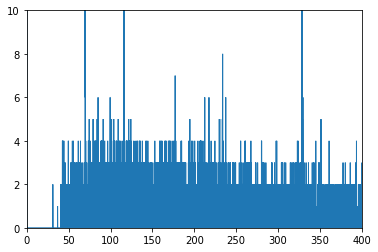

In [6]:
plt.hist(t2_data['calEnergy'], histtype="step", bins = 600000)
plt.xlim(0,400)
plt.ylim(0,10)

In [35]:
idx = []
for i in range(0,len(t2_data['calEnergy'])):
    if t2_data['calEnergy'].iloc[i] < 43.7 and t2_data['calEnergy'].iloc[i] > 43:
        idx.append(i)

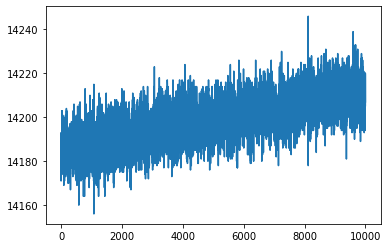

In [4]:
wave1 = waves[0]["waveform"]["values"].nda[3][0:10000]
plt.plot(wave1)

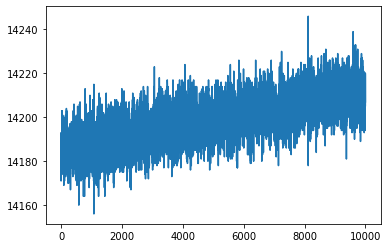

In [5]:
plt.plot(wave1)

In [6]:
import pywt

In [7]:
cDs = pywt.swt(wave1, "haar", level=4)
print(cDs)

[(array([56731.75, 56730.75, 56733.25, ..., 56752.  , 56744.25, 56738.25]), array([-0.25, -3.25, -0.75, ..., 21.  , 13.25,  6.75])), (array([40115.22835688, 40112.39992976, 40115.93546367, ...,
       40144.5732883 , 40133.6131332 , 40124.77429843]), array([-3.8890873 , -1.76776695,  3.18198052, ..., 33.9411255 ,
       14.49568901, -3.53553391])), (array([28363. , 28362.5, 28368.5, ..., 28410.5, 28389. , 28370. ]), array([ -1. , -14.5,  -4.5, ...,  18.5,  27. ,  22. ])), (array([20054.96252801, 20045.06303308, 20056.37674158, ...,
       20102.33868235, 20093.1462942 , 20076.17573145]), array([  5.65685425,   4.24264069, -15.55634919, ...,   7.77817459,
         1.41421356,  15.55634919]))]


In [8]:
threshold = np.zeros_like([0,0,0,0])

i = 0
for cD in cDs:
    median_value = median(cD[1])
    median_average_deviation = median([abs(number-median_value) for number in cD[1]])
    sig1 = median_average_deviation/0.6745
    threshold[i] = sig1*np.sqrt(2*np.log(len(wave1)))
    i+=1
print(threshold)

[34 31 28 31]


In [9]:
i = 0
for cD in cDs:
    cD[1][abs(cD[1]) < threshold[i]] = 0.0
    i += 1

print(cDs[0][1])

[0. 0. 0. ... 0. 0. 0.]


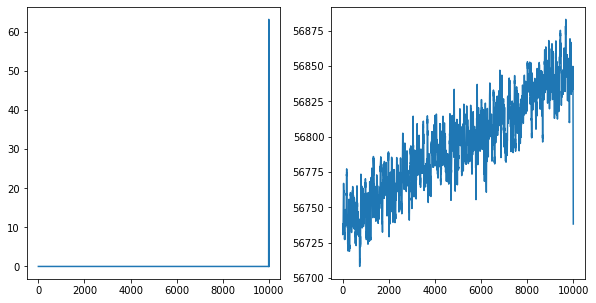

In [10]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1,2,1)
plt.plot(cDs[0][1])
plt.subplot(1,2,2)
plt.plot(cDs[0][0])

In [11]:
deNoiseWave = pywt.iswt(cDs, "Haar")

In [12]:
mean = sum(deNoiseWave[0:10000])/len(deNoiseWave[0:10000])
variance = sum([((x - mean) ** 2) for x in deNoiseWave[0:10000]]) / len(deNoiseWave[0:10000])
(variance ** 0.5) * 0.0408625 -0.16892

0.16739983586458304

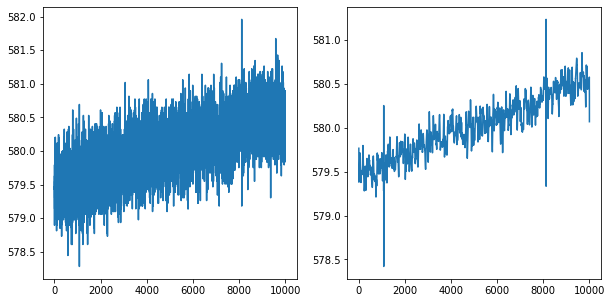

In [13]:
plt.subplot(1,2,1)
plt.plot(wave1*0.0408625 -0.16892)
plt.subplot(1,2,2)
plt.plot(deNoiseWave*0.0408625 -0.16892)

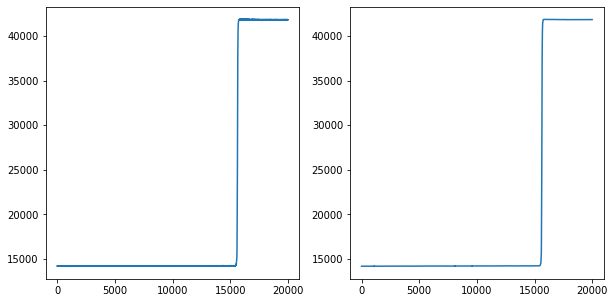

In [25]:
plt.subplot(1,2,1)
plt.plot(wave1)
plt.subplot(1,2,2)
plt.plot(deNoiseWave)

In [14]:
wave1 = wave1 - np.mean(wave1[0:15000])
deNoiseWave = deNoiseWave - np.mean(deNoiseWave[0:15000])

rms1 = np.sqrt(sum(wave1[0:15000]**2)/len(wave1[0:15000]))
rms2 = np.sqrt(sum(deNoiseWave[0:15000]**2)/len(deNoiseWave[0:15000]))

In [16]:
print(rms1*0.0408625 -0.16892)
print(rms2*0.0408625 -0.16892)

0.2696276372256071
0.16739983586458304


In [99]:
rms2 = rms2*0.0408625 -0.16892

In [62]:
check90 = wave1 > 0.9*np.max(wave1)
t90 = np.argmax(check90)
check10 = wave1 > 0.1*np.max(wave1)
t10 = np.argmax(check10)
rise = (t90-t10)*8
print(rise)

368


In [71]:
riseNorm = np.ones(len(idx))
j = 0
for i in idx:
    wave = waves[0]["waveform"]["values"].nda[i]
    check90 = wave1 > 0.9*np.max(wave1)
    t90 = np.argmax(check90)
    check10 = wave1 > 0.1*np.max(wave1)
    t10 = np.argmax(check10)
    riseNorm[j] = (t90-t10)*8
    j+=1

(367.9, 368.1)

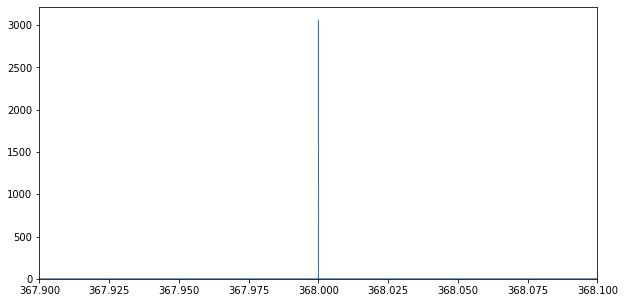

In [68]:
plt.hist(riseNorm, histtype="step", bins=100000)
plt.xlim(367.9, 368.1)

In [69]:
riseNorm

array([368., 368., 368., ..., 368., 368., 368.])